Sales Data Analysis

In [1]:
# Import pandas library for data manipulation and analysis
import pandas as pd
# Import numpy for numerical operations
import numpy as np
# Import matplotlib's pyplot for creating visualizations
import matplotlib.pyplot as plt
# Import seaborn for statistical data visualization
import seaborn as sns
# Import warnings module to manage warning messages
import warnings
# Disable warning messages to keep output clean
warnings.filterwarnings('ignore')

Importing The CSV File.

In [2]:
df = pd.read_csv("Sales Dataset.csv")
df.head()

,Order ID,Amount,Profit,Quantity,Category,Sub-Category,PaymentMode,Order Date,CustomerName,State,City,Year-Month
0,B-26776,9726,1275,5,Electronics,Electronic Games,UPI,2023-06-27,David Padilla,Florida,Miami,2023-06
1,B-26776,9726,1275,5,Electronics,Electronic Games,UPI,2024-12-27,Connor Morgan,Illinois,Chicago,2024-12
2,B-26776,9726,1275,5,Electronics,Electronic Games,UPI,2021-07-25,Robert Stone,New York,Buffalo,2021-07
3,B-26776,4975,1330,14,Electronics,Printers,UPI,2023-06-27,David Padilla,Florida,Miami,2023-06
4,B-26776,4975,1330,14,Electronics,Printers,UPI,2024-12-27,Connor Morgan,Illinois,Chicago,2024-12


Getting information on dataset.

In [3]:
df.shape

(1194, 12)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1194 entries, 0 to 1193
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Order ID      1194 non-null   object
 1   Amount        1194 non-null   int64 
 2   Profit        1194 non-null   int64 
 3   Quantity      1194 non-null   int64 
 4   Category      1194 non-null   object
 5   Sub-Category  1194 non-null   object
 6   PaymentMode   1194 non-null   object
 7   Order Date    1194 non-null   object
 8   CustomerName  1194 non-null   object
 9   State         1194 non-null   object
 10  City          1194 non-null   object
 11  Year-Month    1194 non-null   object
dtypes: int64(3), object(9)
memory usage: 112.1+ KB


Number of Duplicated Values

In [5]:
df.duplicated().sum()

0

In [6]:
df.describe(include = "object")

,Order ID,Category,Sub-Category,PaymentMode,Order Date,CustomerName,State,City,Year-Month
count,1194,1194,1194,1194,1194,1194,1194,1194,1194
unique,547,3,12,5,648,802,6,18,61
top,B-26032,Furniture,Tables,Debit Card,2022-12-08,Michael Rodriguez,New York,Buffalo,2022-12
freq,12,407,122,260,8,4,226,90,45


In [7]:
df.describe(include = "int")

,Amount,Profit,Quantity
count,1194.000000,1194.000000,1194.000000
mean,5178.089615,1348.992462,10.674204
std,2804.921955,1117.992573,5.777102
min,508.000000,50.000000,1.000000
25%,2799.000000,410.000000,6.000000
50%,5152.000000,1014.000000,11.000000
75%,7626.000000,2035.000000,16.000000
max,9992.000000,4930.000000,20.000000


Number of unique values

In [8]:
df["Order ID"].nunique()

547

In [9]:
df["PaymentMode"].nunique()

5

Filtering by state and profit

In [10]:
florida_Orders = df[(df["State"]=="Florida") & (df["Profit"]>1000)]
florida_Orders

,Order ID,Amount,Profit,Quantity,Category,Sub-Category,PaymentMode,Order Date,CustomerName,State,City,Year-Month
0,B-26776,9726,1275,5,Electronics,Electronic Games,UPI,2023-06-27,David Padilla,Florida,Miami,2023-06
3,B-26776,4975,1330,14,Electronics,Printers,UPI,2023-06-27,David Padilla,Florida,Miami,2023-06
12,B-25426,6851,2812,1,Office Supplies,Markers,Debit Card,2020-05-04,Mary Taylor,Florida,Orlando,2020-05
13,B-25426,7626,1046,15,Furniture,Sofas,Credit Card,2020-05-04,Mary Taylor,Florida,Orlando,2020-05
31,B-26157,6045,1606,4,Office Supplies,Paper,COD,2023-12-14,Sierra Rios,Florida,Orlando,2023-12
...,...,...,...,...,...,...,...,...,...,...,...,...
1146,B-25839,4521,1778,9,Office Supplies,Paper,Debit Card,2024-10-15,David Allen,Florida,Tampa,2024-10
1166,B-26675,6499,2189,18,Electronics,Electronic Games,EMI,2021-04-03,James Perez,Florida,Orlando,2021-04
1168,B-25436,8044,3634,3,Office Supplies,Markers,COD,2020-12-24,Andre Fernandez,Florida,Orlando,2020-12
1170,B-25794,7417,1334,16,Furniture,Bookcases,COD,2021-10-05,Amber Flowers,Florida,Tampa,2021-10


Grouping and aggregate

In [11]:
total_category = df.pivot_table(index = "Category", values = ["Profit", "Amount"], aggfunc = {"Profit":"mean", "Amount":"sum"}).reset_index()
total_category

,Category,Amount,Profit
0,Electronics,2054456,1336.546392
1,Furniture,2038673,1328.113022
2,Office Supplies,2089510,1382.393484


In [12]:
total_subcategory = df.pivot_table(index = "Sub-Category", values = ["Profit", "Amount"], aggfunc = {"Profit":"mean", "Amount":"sum"}).reset_index()
total_subcategory["Profitability"] = total_subcategory["Profit"]/total_subcategory["Amount"]
total_subcategory.sort_values(by = "Profitability", ascending = True).reset_index(drop = True)

,Sub-Category,Amount,Profit,Profitability
0,Tables,625177,1285.213115,0.002056
1,Pens,552269,1139.000000,0.002062
2,Sofas,568367,1253.105263,0.002205
3,Phones,503055,1124.821782,0.002236
4,Electronic Games,565092,1427.442308,0.002526
5,Markers,627875,1588.627273,0.002530
6,Printers,566359,1539.568421,0.002718
7,Paper,524755,1439.644231,0.002743
8,Laptops,419950,1252.954545,0.002984
9,Bookcases,413165,1340.909091,0.003245


Top 10 months with most orders

In [13]:
total_order = df.groupby("Year-Month")["Order ID"].count().reset_index()
total_order.nlargest(10, "Order ID").reset_index(drop = True)

,Year-Month,Order ID
0,2022-12,45
1,2022-08,33
2,2022-01,31
3,2023-07,30
4,2021-11,28
5,2022-10,28
6,2020-04,27
7,2022-06,27
8,2024-06,27
9,2020-10,26


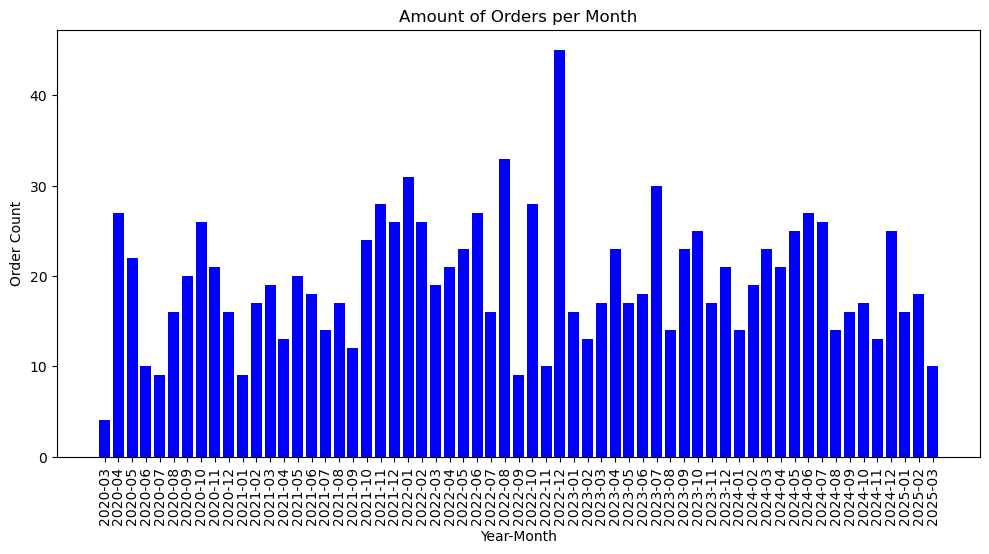

In [14]:
# Plot
plt.figure(figsize = (10,5))
plt.bar(total_order["Year-Month"], total_order["Order ID"], color = 'blue')
plt.xlabel("Year-Month")
plt.ylabel("Order Count")
plt.tight_layout()
plt.xticks(rotation = 90)
plt.title("Amount of Orders per Month")
plt.show()

Data Handling

In [15]:
dates = pd.to_datetime(df["Order Date"])
df["Months"] = dates.dt.month_name()
df

,Order ID,Amount,Profit,Quantity,Category,Sub-Category,PaymentMode,Order Date,CustomerName,State,City,Year-Month,Months
0,B-26776,9726,1275,5,Electronics,Electronic Games,UPI,2023-06-27,David Padilla,Florida,Miami,2023-06,June
1,B-26776,9726,1275,5,Electronics,Electronic Games,UPI,2024-12-27,Connor Morgan,Illinois,Chicago,2024-12,December
2,B-26776,9726,1275,5,Electronics,Electronic Games,UPI,2021-07-25,Robert Stone,New York,Buffalo,2021-07,July
3,B-26776,4975,1330,14,Electronics,Printers,UPI,2023-06-27,David Padilla,Florida,Miami,2023-06,June
4,B-26776,4975,1330,14,Electronics,Printers,UPI,2024-12-27,Connor Morgan,Illinois,Chicago,2024-12,December
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1189,B-26370,8825,3594,15,Furniture,Tables,Debit Card,2024-07-31,Megan Mclean,New York,New York City,2024-07,July
1190,B-26298,2082,642,8,Electronics,Phones,EMI,2020-06-02,Caitlin Hunt,New York,Rochester,2020-06,June
1191,B-26298,2082,642,8,Electronics,Phones,EMI,2022-12-15,Jenna Holland,Texas,Austin,2022-12,December
1192,B-26298,2082,642,8,Electronics,Phones,EMI,2020-08-07,Stephanie Oconnell,New York,Buffalo,2020-08,August


Filtering By December and counting how many orders for that month.

In [16]:
decem = df[df["Months"] == "December"]
decem = decem["Order ID"].count()
decem

133

In [17]:
df.sort_values(by="Amount", ascending = False)

,Order ID,Amount,Profit,Quantity,Category,Sub-Category,PaymentMode,Order Date,CustomerName,State,City,Year-Month,Months
121,B-25936,9992,3696,20,Office Supplies,Pens,Debit Card,2022-04-15,Susan Burke,Texas,Austin,2022-04,April
122,B-25936,9992,3696,20,Office Supplies,Pens,Debit Card,2022-08-29,Brent Hernandez,New York,Rochester,2022-08,August
120,B-25936,9992,3696,20,Office Supplies,Pens,Debit Card,2021-10-09,Patrick Williams,New York,Rochester,2021-10,October
251,B-25861,9989,3930,14,Furniture,Tables,Debit Card,2022-09-22,Cassandra Farley,Florida,Orlando,2022-09,September
250,B-25861,9989,3930,14,Furniture,Tables,Debit Card,2023-07-15,Jennifer Chase,New York,Buffalo,2023-07,July
...,...,...,...,...,...,...,...,...,...,...,...,...,...
749,B-25465,508,177,17,Furniture,Sofas,UPI,2022-03-23,Tony Ray,Ohio,Cleveland,2022-03,March
750,B-25465,508,177,17,Furniture,Sofas,UPI,2020-06-24,Steven Frey,Florida,Miami,2020-06,June
751,B-25465,508,177,17,Furniture,Sofas,UPI,2022-12-23,Stephanie Leonard,New York,Buffalo,2022-12,December
753,B-25465,508,177,17,Furniture,Sofas,UPI,2020-11-06,Robert White,Florida,Orlando,2020-11,November


Monthly Sales Amount

In [18]:
# Create an ordered list of months to sort them correctly
month_order = [
    "January", "February", "March", "April", "May", "June",
    "July", "August", "September", "October", "November", "December"
]

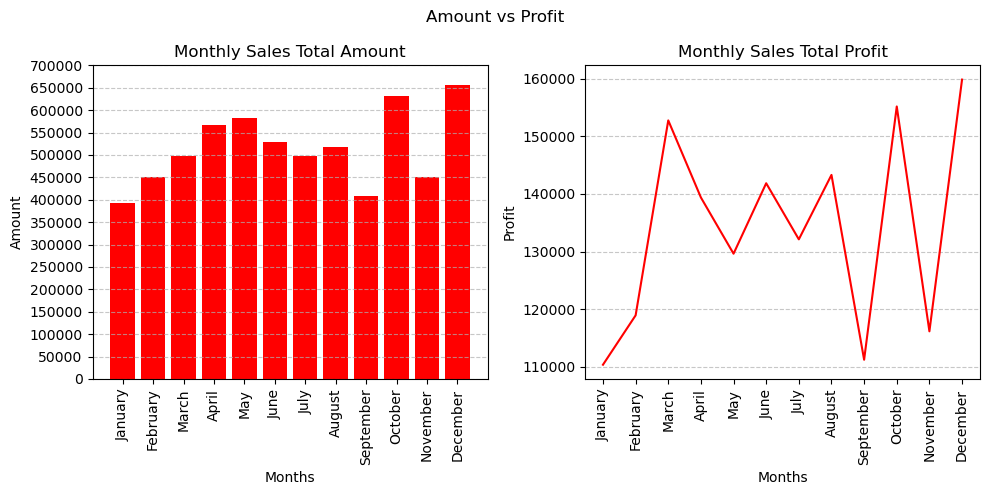

In [19]:
monthly_sales = df.groupby("Months")["Amount"].sum().reindex(month_order)
# Plot1
plt.figure(figsize = (10,5))
plt.subplot(1,2,1)
plt.bar(monthly_sales.index, monthly_sales.values, color = 'red')
plt.xlabel("Months")
plt.ylabel("Amount")
plt.title("Monthly Sales Total Amount")
# Grid with dashed lines and transparency
plt.grid(True, axis='y', linestyle='--', alpha=0.7) 
plt.xticks(rotation = 90)
plt.ylim(0,700000)
plt.yticks(np.arange(0,700001,50000))


monthly_profit = df.groupby("Months")["Profit"].sum().reindex(month_order)
# Plot2
plt.subplot(1,2,2)
plt.plot(monthly_profit.index, monthly_profit.values, color = 'red')
plt.xlabel("Months")
plt.ylabel("Profit")
plt.title("Monthly Sales Total Profit")
# Grid with dashed lines and transparency
plt.grid(True, axis='y', linestyle='--', alpha=0.7) 
plt.xticks(rotation = 90)
plt.yticks()

plt.suptitle("Amount vs Profit")
plt.tight_layout()
plt.show()

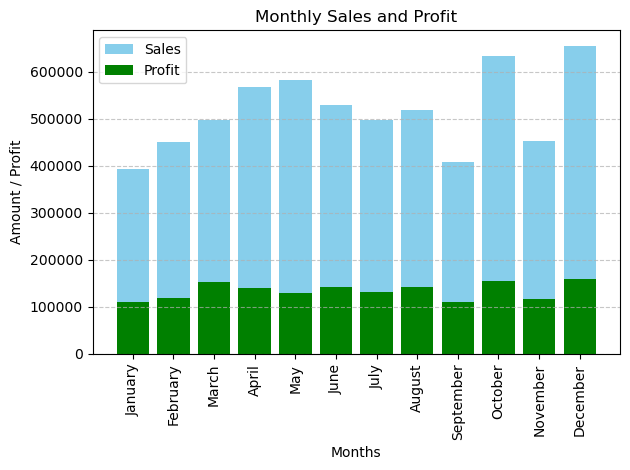

In [20]:
# Plot
fig, ax1 = plt.subplots()

# Bar plot for Sales
ax1.bar(monthly_sales.index, monthly_sales.values, color='skyblue', label="Sales")

# Line plot for Profit on same y-axis
ax1.bar(monthly_profit.index, monthly_profit.values, color='green', label="Profit")

# Axis labels and title
ax1.set_xlabel("Months")
ax1.set_ylabel("Amount / Profit")
ax1.set_title("Monthly Sales and Profit")

# Rotate x-axis labels
ax1.tick_params(axis='x', rotation=90)

# Grid
ax1.grid(True, axis='y', linestyle='--', alpha=0.7)

# Add legend
ax1.legend()

# Layout
plt.tight_layout()
plt.show()


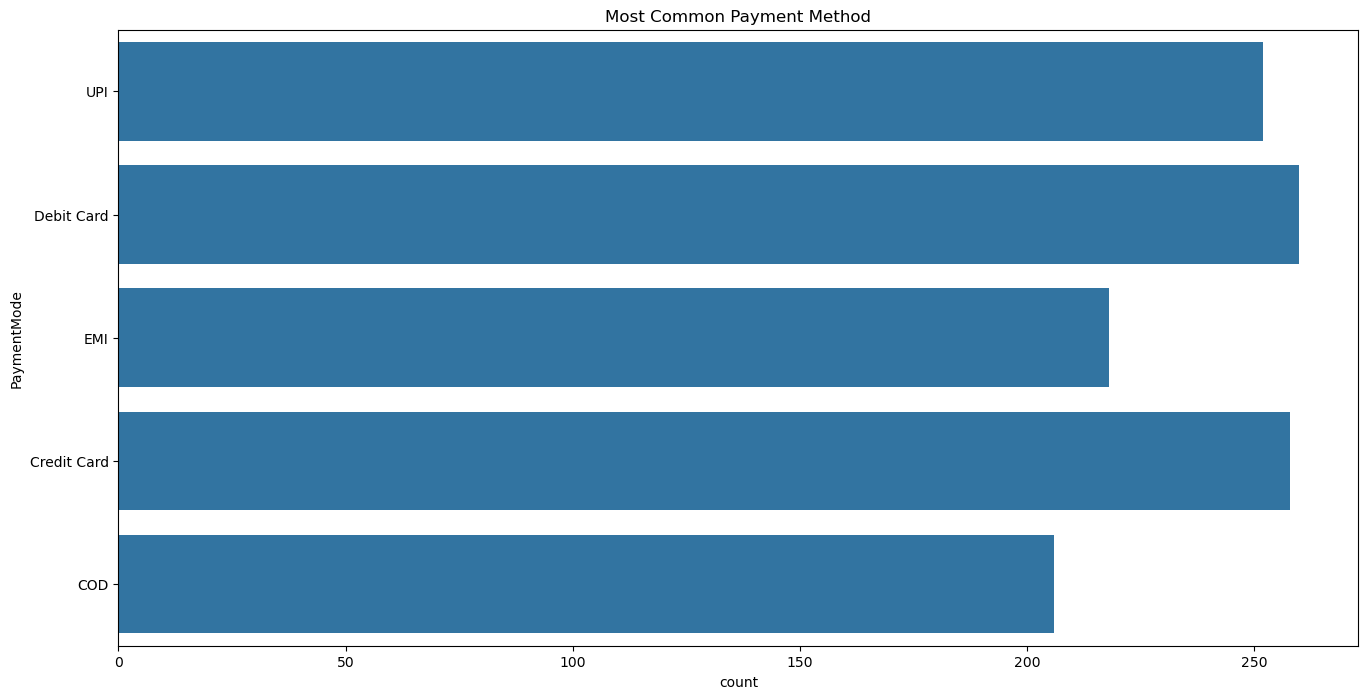

In [21]:
plt.figure(figsize=(16,8))
sns.countplot(df['PaymentMode'])
plt.title("Most Common Payment Method")
plt.show()

Top 5 Client by Amount spent

In [22]:
top5 = df.groupby(["Order ID","Category"]).Amount.sum().reset_index()
top5.nlargest(5,"Amount").reset_index(drop=True)

,Order ID,Category,Amount
0,B-25936,Office Supplies,58833
1,B-26332,Furniture,52983
2,B-26489,Furniture,45498
3,B-25901,Office Supplies,45279
4,B-26776,Electronics,44103


In [23]:
df["Order ID"].value_counts()

Order ID
B-26032    12
B-26489    12
B-25465    12
B-26279    10
B-25715     9
           ..
B-26890     1
B-26924     1
B-25486     1
B-25196     1
B-25068     1
Name: count, Length: 547, dtype: int64

Average Quantity per category

In [27]:
df["Category"].value_counts()

Category
Furniture          407
Office Supplies    399
Electronics        388
Name: count, dtype: int64

In [29]:
top3 = df.groupby("Category").Quantity.mean().reset_index()
top3.nlargest(3,"Quantity").reset_index(drop=True)

,Category,Quantity
0,Electronics,10.974227
1,Furniture,10.911548
2,Office Supplies,10.140351


Top 5 Most Profitable Sub-Categories

In [32]:
highest_sub = df.groupby("Sub-Category").Profit.sum().reset_index()
highest_sub.nlargest(5,"Profit").reset_index(drop=True)

,Sub-Category,Profit
0,Markers,174749
1,Tables,156796
2,Paper,149723
3,Electronic Games,148454
4,Printers,146259


Lowest Profit Margin(Profit margin = Profit ÷ Amount) for the Sub-Categories

In [35]:
sub_margin = df.pivot_table(index = ["Sub-Category","Category"], values = ["Profit","Amount"], aggfunc = "sum").reset_index()
sub_margin["Profit Margin"] = sub_margin["Profit"]/sub_margin["Amount"]
sub_margin.sort_values(by="Profit Margin").reset_index(drop=True)

,Sub-Category,Category,Amount,Profit,Profit Margin
0,Phones,Electronics,503055,113607,0.225834
1,Pens,Office Supplies,552269,129846,0.235114
2,Tables,Furniture,625177,156796,0.250803
3,Sofas,Furniture,568367,142854,0.251341
4,Binders,Office Supplies,384611,97257,0.252871
5,Printers,Electronics,566359,146259,0.258244
6,Laptops,Electronics,419950,110260,0.262555
7,Electronic Games,Electronics,565092,148454,0.262708
8,Markers,Office Supplies,627875,174749,0.278318
9,Chairs,Furniture,431964,122892,0.284496


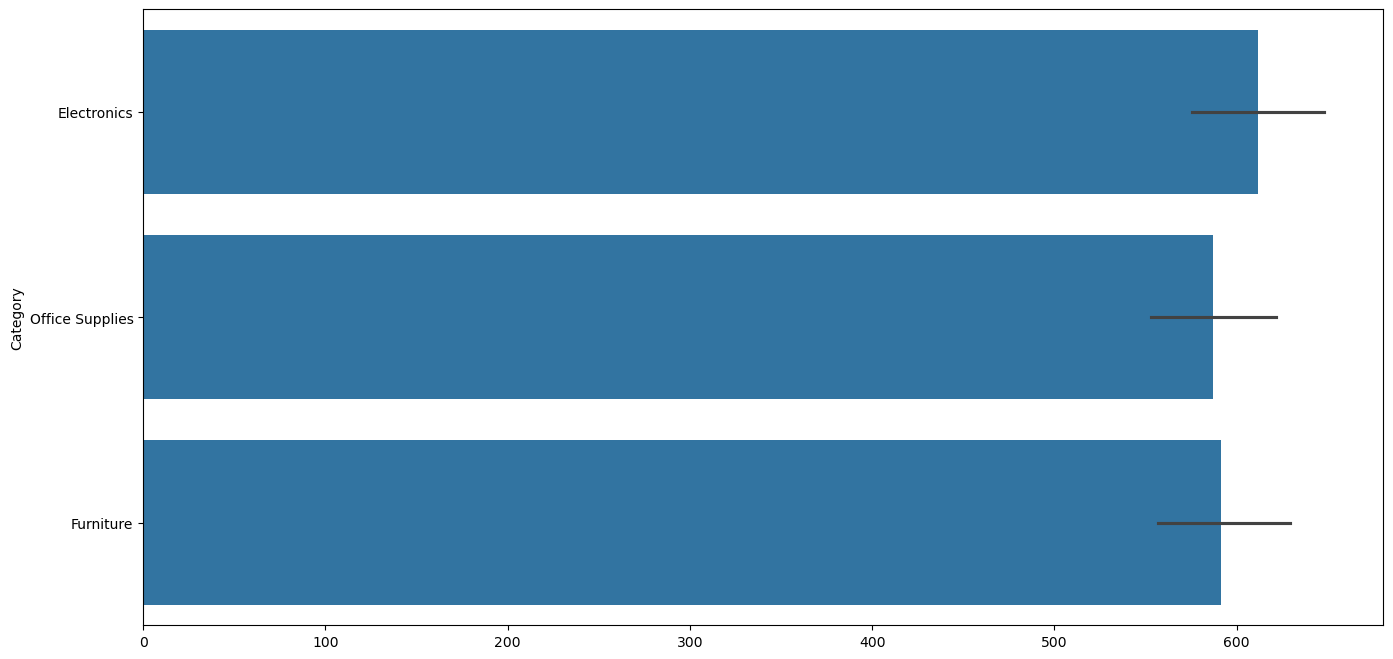

In [37]:
plt.figure(figsize=(16,8))
sns.barplot(df['Category'])
plt.show()

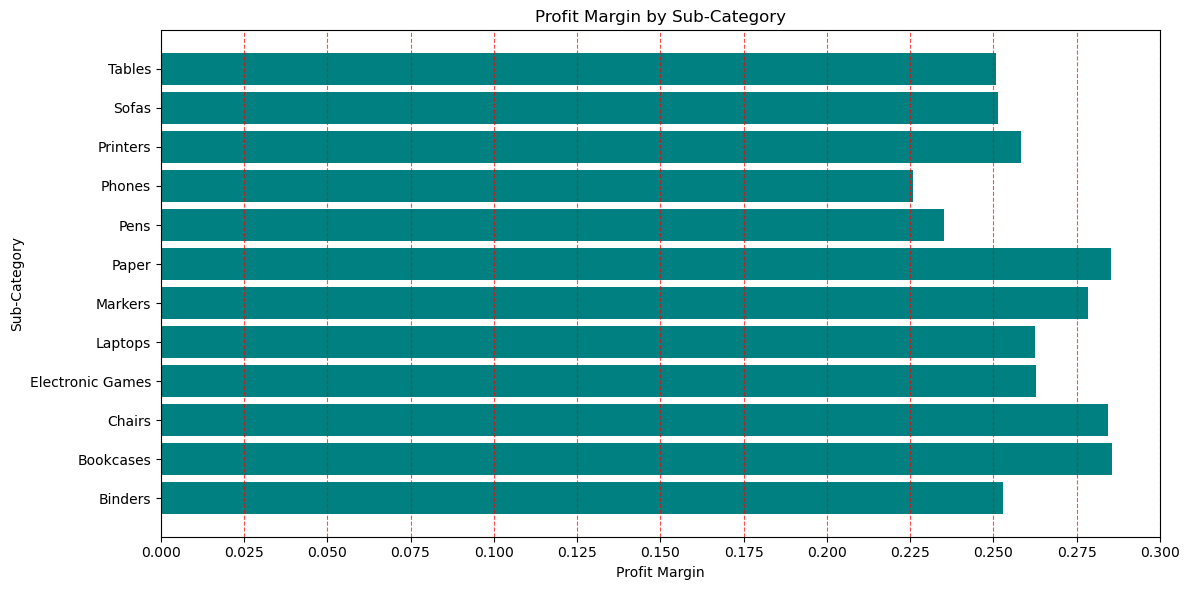

In [39]:
plt.figure(figsize=(12,6))
plt.barh(sub_margin["Sub-Category"], sub_margin["Profit Margin"], color="teal")
plt.xlabel("Profit Margin")
plt.ylabel("Sub-Category")
plt.title("Profit Margin by Sub-Category")
plt.grid(True, axis='x', linestyle='--', alpha=0.7, color = "red")
plt.xticks(np.arange(0,0.31,0.025))
plt.tight_layout()
plt.show()

In [41]:
trend = (
    df.groupby("Months")["Sub-Category"]
    .agg(lambda x: x.mode().iloc[0])  # get first mode if there's a tie
    .reindex(month_order)
)

trend.columns = ["Month", "Most Frequent Sub-Category"]
print(trend)

Months
January                  Pens
February               Chairs
March        Electronic Games
April                    Pens
May                    Tables
June                Bookcases
July                    Paper
August                  Sofas
September             Laptops
October                  Pens
November               Tables
December               Tables
Name: Sub-Category, dtype: object


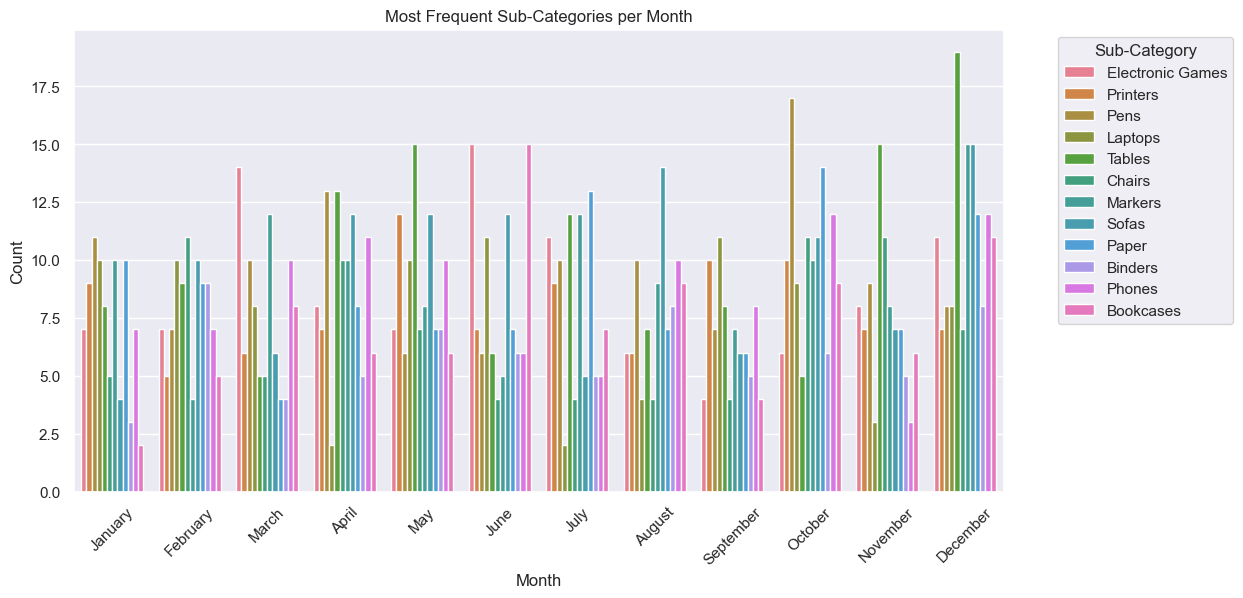

In [43]:
# Set up the visual style
sns.set(style="darkgrid")
plt.figure(figsize=(12, 6))

# Create the countplot
sns.countplot(
    data=df,
    x="Months",
    hue="Sub-Category",
    order=month_order
)

# Add titles and labels
plt.title("Most Frequent Sub-Categories per Month")
plt.xlabel("Month")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.legend(title="Sub-Category", bbox_to_anchor=(1.05, 1), loc='upper left')


In [44]:
total_subcategory = df.pivot_table(index = "State", columns = "Sub-Category", values = "Profit", aggfunc = "mean").reset_index()
total_subcategory

Sub-Category,State,Binders,Bookcases,Chairs,Electronic Games,Laptops,Markers,Paper,Pens,Phones,Printers,Sofas,Tables
0,California,1439.312500,1464.173913,1334.235294,1360.428571,1417.133333,1568.888889,989.681818,995.826087,1025.947368,1146.933333,1103.526316,1586.083333
1,Florida,1054.333333,1659.545455,2151.272727,1452.400000,1518.666667,1715.619048,1985.363636,834.400000,1481.866667,1803.909091,1228.444444,1412.363636
2,Illinois,1235.833333,1564.666667,1275.153846,1319.235294,1221.909091,1279.777778,1659.333333,1002.263158,1763.000000,1314.428571,1307.411765,989.214286
3,New York,1690.000000,1007.200000,1225.850000,1314.900000,1600.352941,1474.684211,1366.526316,1477.090909,869.181818,2138.583333,1269.652174,1468.684211
4,Ohio,1159.916667,986.250000,1466.066667,1527.230769,815.625000,1781.823529,1003.916667,1116.777778,653.000000,1578.600000,1481.631579,968.000000
5,Texas,1557.777778,1531.400000,1923.000000,1547.363636,1081.900000,1713.823529,1426.875000,1340.294118,1249.600000,1341.727273,1122.000000,1146.333333


<Axes: xlabel='Sub-Category', ylabel='Sub-Category'>

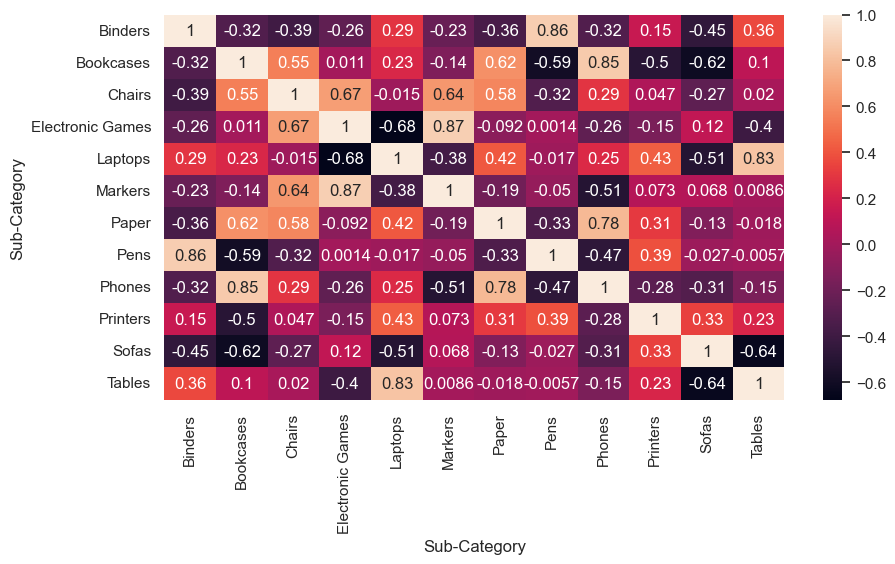

In [47]:
correlation_matrix = total_subcategory.drop(columns="State").corr()
plt.figure(figsize=(10, 5))
sns.heatmap(correlation_matrix, annot=True)